<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/pfk_kinetic_paraneters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phosphofructokinase 1

PFK is is one of the most important regulatory enzymes involved in glycolisis, it catalizes the following reaction:




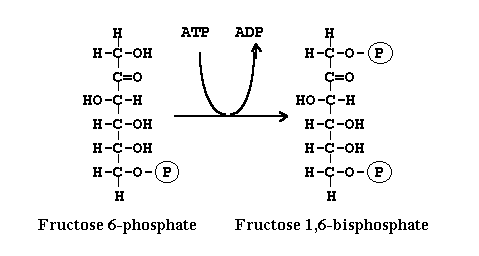

The enzyme is allosteric activated by GDP (guanosine diphosphate), and inhibited by PEP (phosphoenolpyruvate). Interestingly, ADP is both a product of the reaction **and** an allosteric activator of the enzyme.

## Exercise
1. Go to the [PDB database page for PFK](https://www.rcsb.org/structure/4PFK), and observe it's structure. How many subunits do you count?
1. Simplify the generic rate equation for the specific case of PFK

$$
v=\frac{V_{max}^+ \prod_i \frac{s_i}{K_i}\mathcal{C_R}^{n-1}\left(1-\frac{\prod_j \frac{p_j}{K_j}}{\prod_i \frac{s_i}{K_i}K_{eq}}\right)}{\mathcal{C_R}^n+L\frac{\mathcal{A_T}^n}{\mathcal{A_R}^{n}}\mathcal{C_T}^n}.
$$

You only need to write down the binding polynomials and substitute the correct concentrations. Assume that the catalytic site consist of 2 binding sites, one where F6P and F16P compete, and one where ATP and ADP compete. On the allosteric site, GDP and ADP compete.

1. I see 4 subunits.
2. $$B = (1+\frac{f6p}{K_{F6P}}+\frac{f16p}{K_{F16P}})^4(1+\frac{atp}{K_{ATP}}+\frac{adp}{K_{ADP}})^4(1+\frac{gdp}{K_{GDP}}+\frac{adp}{K_{ADP}}+\frac{pep}{K_{PEP}})^4$$


$$
v=\frac{4V_{max}^+ \frac{atp\cdot f6p}{K_{ATP}K_{F6P}}  (1+\frac{atp\cdot f6p}{K_{ATP}K_{F6P}}+\frac{adp\cdot f16p}{K_{ADP}K_{F16P}})^3 }{B}
$$

# Fitting parameters

We will now try to find the kinectic parametes using data from the paper "Kinetics of the Allosteric Interactions of Phosphofructokinase from Escherichia coli". Both the paper and data can be found on canvas.

We load the data below:

In [4]:
import pandas as pd

data = pd.read_csv('PFK_exercise_data.csv', sep='\t')

data

,ATP,F6P,ADP,PEP,GDP,PFK-activity,Normalized-activity,a1,a2,a3,a4,a5
0,0.1,0.00403,0.82,0.0,0.000000,0.005854,0.081565,1,0,0,0,0
1,0.1,0.00921,0.82,0.0,0.000000,0.010457,0.145686,1,0,0,0,0
2,0.1,0.01850,0.82,0.0,0.000000,0.016413,0.228666,1,0,0,0,0
3,0.1,0.03990,0.82,0.0,0.000000,0.022234,0.309760,1,0,0,0,0
4,0.1,0.05890,0.82,0.0,0.000000,0.024264,0.338048,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.1,1.00000,0.00,0.0,0.023767,49.909910,0.862033,0,0,0,0,1
157,0.1,1.00000,0.00,0.0,0.031527,51.831830,0.895228,0,0,0,0,1
158,0.1,1.00000,0.00,0.0,0.040026,53.213212,0.919087,0,0,0,0,1
159,0.1,1.00000,0.00,0.0,0.079812,56.456456,0.975104,0,0,0,0,1


There are a few peculiarities of the data that need to be explained. This data was taked directly from plots on the paper (Figures 5, 9, 10 and 11).

Columns ATP, F6P, ADP, PEP and GDP contains concentrations of the respective metabolites. PFK-activity is the measured rate of the reactions, and Normalized-activity is the same rate normalized by the maximum rate measured at each plot (note that this may not be equal to $V_{max}^+$).

Colums a1 to a5 indicate where the data was taken from (the different experiments in the plot). Because the experiments were done in different conditions, they do not share the same value for the $V_{max}^+$ parameter.

Finally, the value for $K_{atp}$ is calculated on Figure 8 of the paper, and does not need to be fitted. You can use $K_{atp} = 0.6$.

## Exercise

3. We want to fit the data for all the experiments at once. Is it better to use the normalized or unormalized values for the rate?

4. What are the parameters that are left to fit?

Check your answers for the above with the TAs before going foward 😀

5. Try to reproduce Figures 5, 9, 10 and 11 from the data. You can use the code below as a guide.
You will notice that the concentrations are in different units in the plot and the data.


3. It would be better to normalize the data since the experiments were done in different conditions
4. $$K_{ATP}, K_{F6P}, K_{ADP}, K_{F16P}, K_{GDP}, K_{PEP}$$

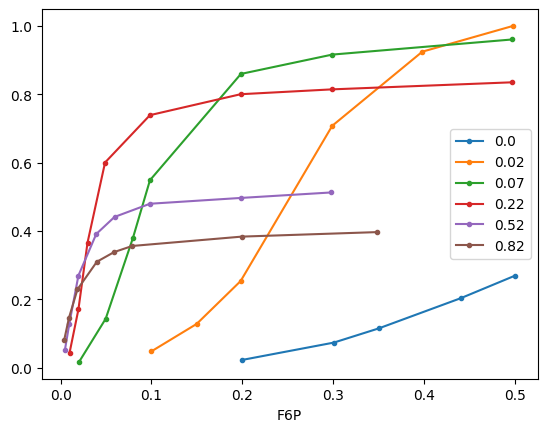

In [5]:
import matplotlib.pyplot as plt

#separate plots
data_per_plot = {}

for i in range(5):
  data_per_plot[i] = data[data.iloc[:,7+i] == 1]

#Figure 5

fig, ax = plt.subplots()
for label, grp in data_per_plot[0].groupby('ADP'):
  grp.plot(x = 'F6P', y = 'Normalized-activity',ax = ax, label = label, marker = '.')

6. Write down the rate equation as a python function. It is advisable to write down all the polynomials separatelly and combine them only afterwards.

7. We will soon fit the parameters to the data. You already know the value for $K_{atp} = 0.6$. You can make the following further assumptions to facilitate the fitting: $K'_{atp} = K_{atp}$ and $K'_{adp} = K_{adp}$. What do these assumptions mean in practice?

8. With this we can fit the equation. We want to fit all the data at once, but as stated, each experiment has a different value for $V_{max}$. A good shortcut for doing so is to use the values of columns a1 to a5 in the data, and write a new function to fit:
$$
v = a1\cdot v1 + a2\cdot v2 + a3\cdot v3 + a4\cdot v4 + a5\cdot v5
$$
Where $v1...v5$ are use the rate equation derived above, and share all parameters except for $V_{max}$.

9. Finally, fit the function to the data. Do not forget to make all parameters strictly positive, i.e. ``curve_fit(fun, x_data,y_data, bounds=(0, np.inf))``

In [1]:
def rate_eqn():

SyntaxError: incomplete input (<ipython-input-1-85f0f9bd2386>, line 1)

10. Do you expect to get a meaninful value for $K_{eq}$ after the fit (check the concentrations of F16P)? What other parameters have the same problem?

11. Plot the rate of the enzyme against the concentration of ADP. Select suitable values for the concentrations of the other metabolites (you can use Figure 5 for this). What do you see? Can you explain the curve?

# Extra (optional)

If you noticed that you cannot fit the enzyme activity well for high or low concentrations of PEP, that is because PEP can actually bind at both the R and T states of the enzyme (with a different $K$). You can adjust your binding polynomials to allow for that and see if you can get a better fit.